In [4]:
import numpy as np
from scipy.signal import convolve

# Generate example data
data = np.array([1, 1, 1, 1, 1, 1])
kernel = np.array([0, 1, 2, 1, 0, 0])

# Using scipy.signal.convolve
A = convolve(kernel, data, mode='full')

# Using the convolution theorem - need to pad with N-1 zeroes
data = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
kernel = np.array([0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0])

D = np.fft.ifft(np.fft.fft(kernel) * np.fft.fft(data))

print (A)
print (D)

[0 1 3 4 4 4 4 3 1 0 0]
[2.42230478e-16+0.j 1.00000000e+00+0.j 3.00000000e+00+0.j
 4.00000000e+00+0.j 4.00000000e+00+0.j 4.00000000e+00+0.j
 4.00000000e+00+0.j 3.00000000e+00+0.j 1.00000000e+00+0.j
 3.22973971e-16+0.j 1.61486985e-16+0.j]


In [5]:
import numpy as np
def DFT_slow(x):
    #Compute the discrete Fourier Transform of the 1D array x
    x = np.asarray(x, dtype=float)
    z = x.shape[0]
    n = np.arange(z)
    i = n.reshape((z, 1))
    M = np.exp(-2j * np.pi * i * n / z)
    return np.dot(M, x)
x = np.random.random(1024)
np.allclose(DFT_slow(x), np.fft.fft(x))
def FFT(x):
    #A recursive implementation of the 1D Cooley-Tukey FFT
    x = np.asarray(x, dtype=float)
    z = x.shape[0]

    if z % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif z <= 32:  # this cutoff should be optimized
        return DFT_slow(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(z) / z)

        X = np.concatenate( \
            [X_even + factor[:int(z / 2)] * X_odd,
             X_even + factor[int(z / 2):] * X_odd])
        return X
x = np.random.random(1024)
np.allclose(FFT(x), np.fft.fft(x))

True

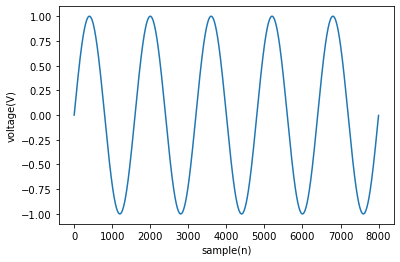

In [6]:
import matplotlib.pyplot as plt
import numpy as np


Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()
